# Explore here

In [2]:
import requests 

url = 'https://raw.githubusercontent.com/4GeeksAcademy/data-preprocessing-project-tutorial/main/AB_NYC_2019.csv'

airbnb = requests.get(url)

if airbnb.status_code == 200:
    with open('airbnb.csv', 'wb') as file:
        file.write(airbnb.content)
    print('Descargado correctamente')
else:
    print(f'error al descargar: {airbnb.status_code}')



Descargado correctamente


In [3]:
import pandas as pd 

total_data = pd.read_csv('../data/raw/airbnb.csv')

total_data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [4]:
total_data.shape

(48895, 16)

In [5]:
total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [6]:
total_data.drop("id", axis = 1).duplicated().sum()

0

In [7]:
if total_data.duplicated().sum():
    total_data = total_data.drop_duplicates()
print(total_data.shape)
total_data.head()

(48895, 16)


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [8]:
total_data.drop(["id", "name", "host_id", "last_review", "reviews_per_month", "host_name"], axis=1, inplace= True)
total_data.head()

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,6,365
1,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2,355
2,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,1,365
3,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,1,194
4,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,1,0


In [9]:
total_data.isnull().sum()

neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

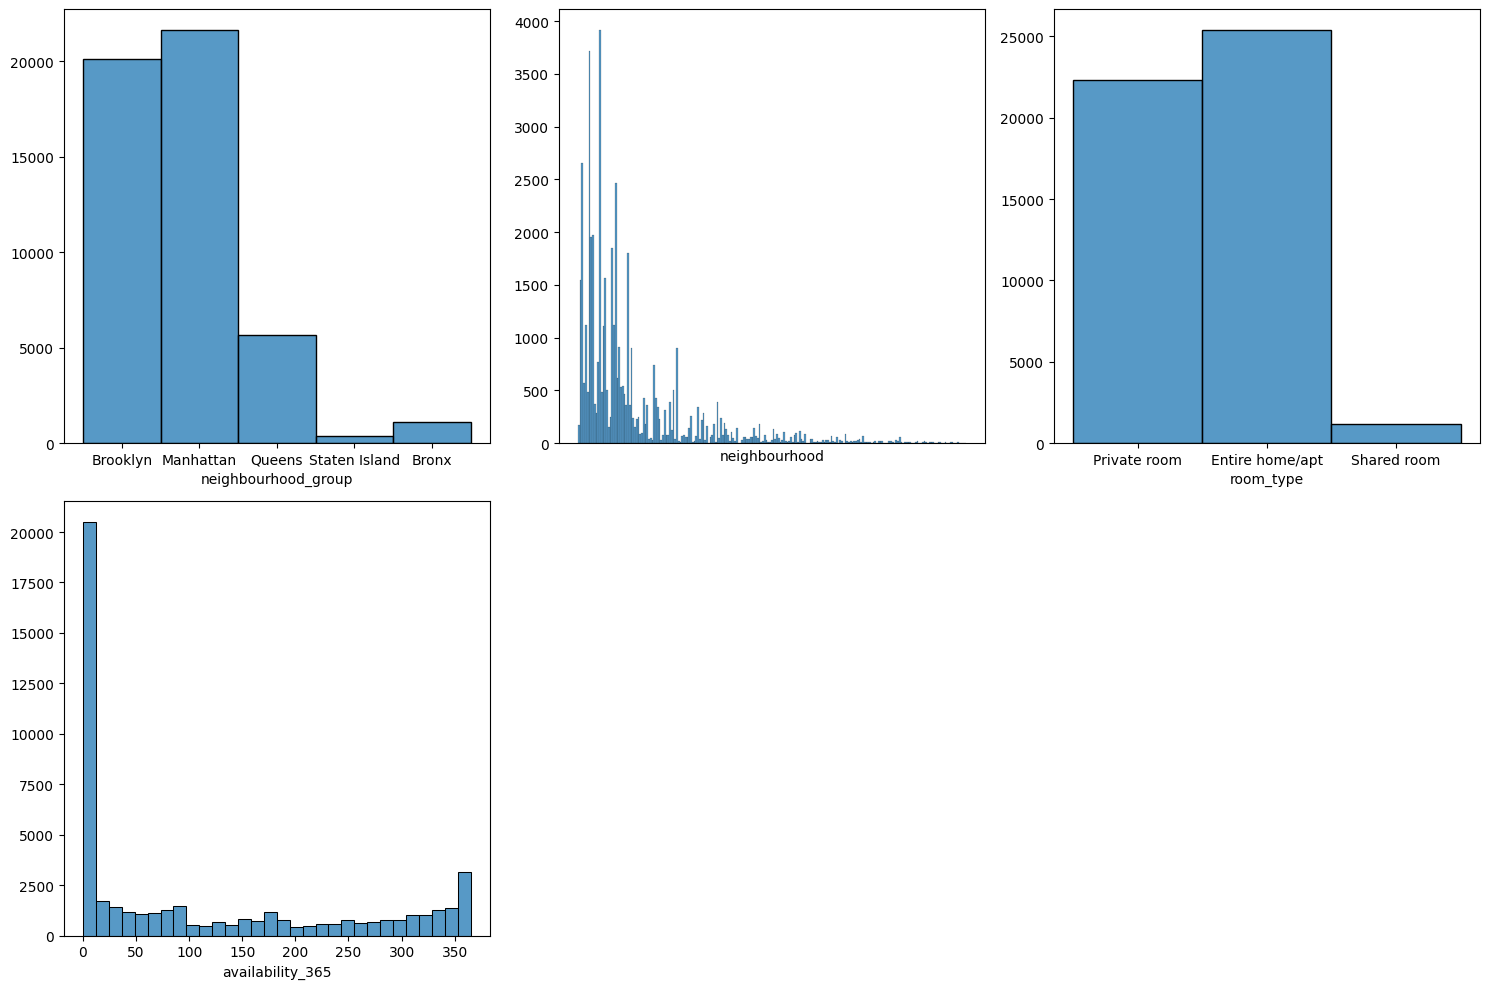

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axis = plt.subplots(2, 3, figsize=(15, 10))

fig.delaxes(axis[1, 2])
fig.delaxes(axis[1, 1])

sns.histplot(ax=axis[0, 0], data=total_data, x="neighbourhood_group").set(ylabel=None)
sns.histplot(ax=axis[0, 1], data=total_data, x="neighbourhood").set(ylabel=None, xticks=[])
sns.histplot(ax=axis[0, 2], data=total_data, x="room_type").set(ylabel=None)
sns.histplot(ax=axis[1, 0], data=total_data, x="availability_365").set(ylabel=None)

plt.tight_layout()
plt.show()

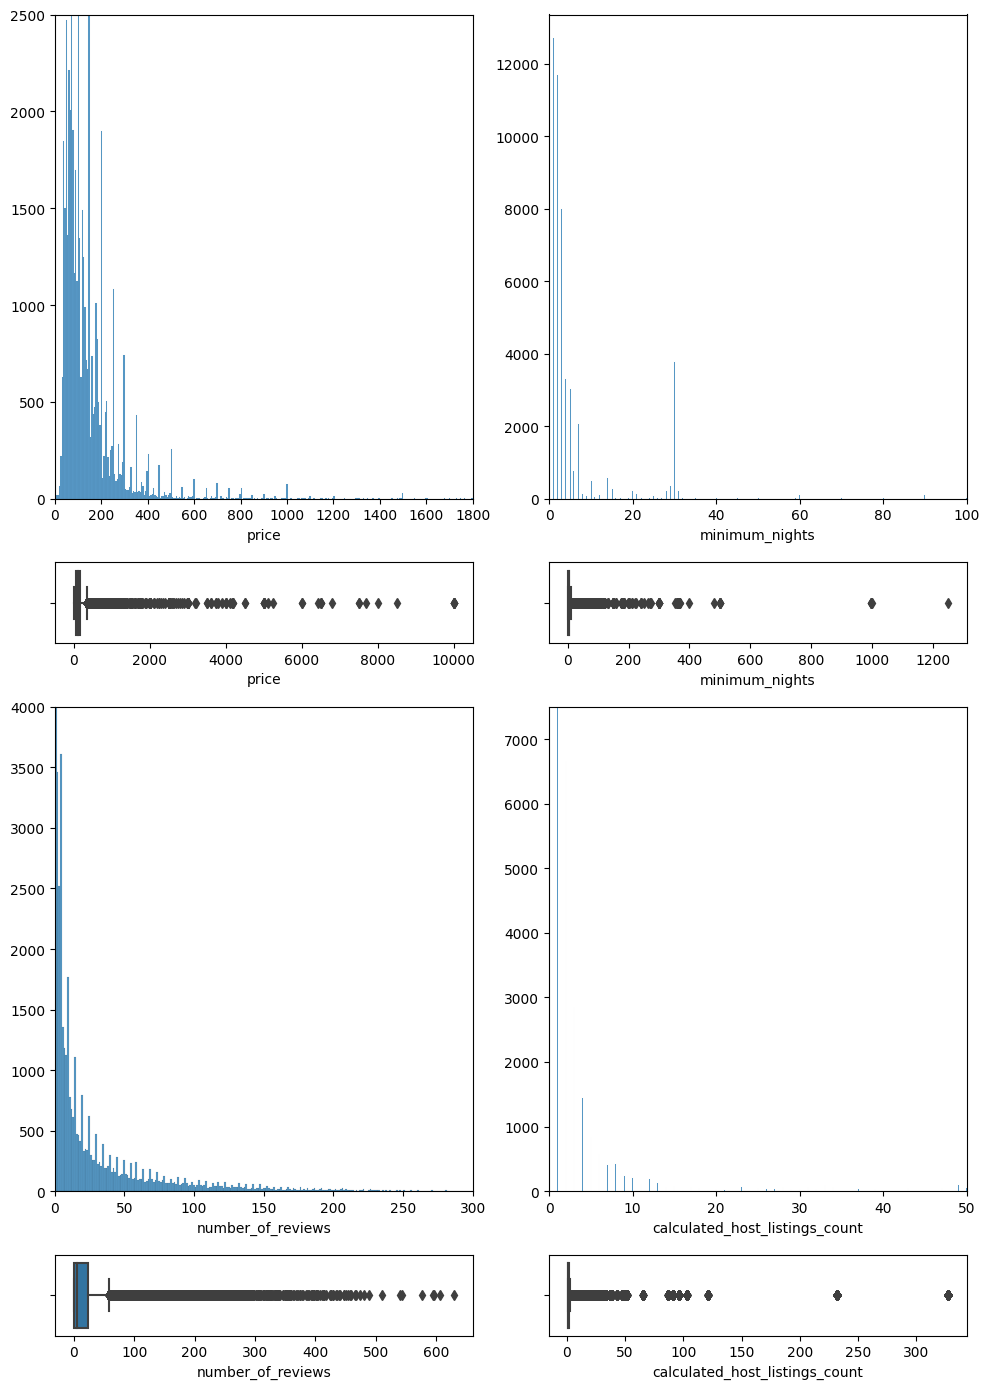

In [11]:
fig, axis = plt.subplots(4, 2, figsize = (10, 14), gridspec_kw = {"height_ratios": [6, 1, 6, 1]})

sns.histplot(ax = axis[0, 0], data = total_data, x = "price").set(xlim = (0, 1800), ylim = (0,2500), ylabel = None)
sns.boxplot(ax = axis[1, 0], data = total_data, x = "price")

sns.histplot(ax = axis[0, 1], data = total_data, x = "minimum_nights").set(xlim = (0, 100), ylabel = None)
sns.boxplot(ax = axis[1, 1], data = total_data, x = "minimum_nights")

sns.histplot(ax = axis[2, 0], data = total_data, x = "number_of_reviews").set(xlim = (0, 300), ylim = (0, 4000), ylabel = None)
sns.boxplot(ax = axis[3, 0], data = total_data, x = "number_of_reviews")

sns.histplot(ax = axis[2,1], data = total_data, x = "calculated_host_listings_count").set(xlim= (0, 50), ylim = (0, 7500), ylabel= None)
sns.boxplot(ax = axis[3, 1], data = total_data, x = "calculated_host_listings_count")


plt.tight_layout()
plt.show()


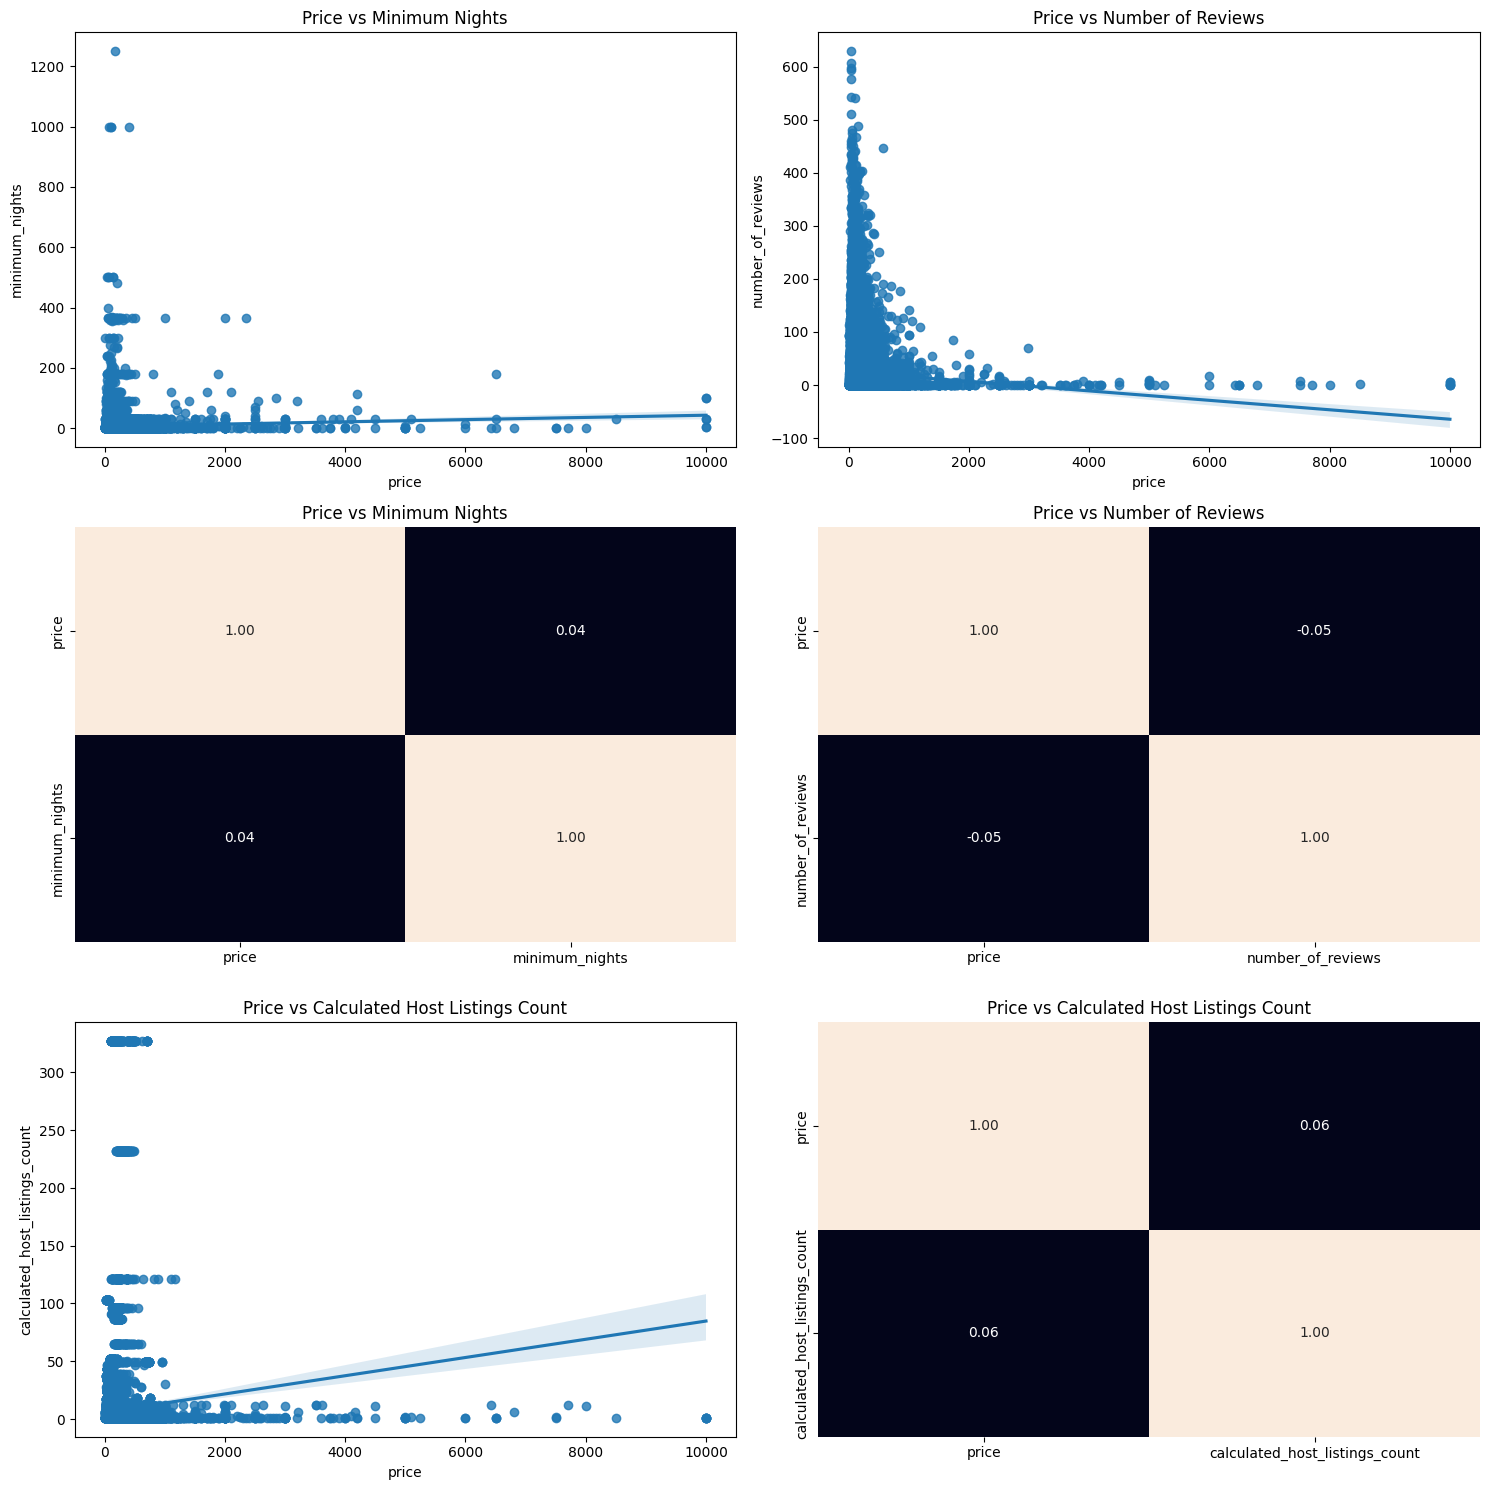

In [12]:

fig, axis = plt.subplots(3, 2, figsize=(15, 15))

sns.regplot(ax=axis[0, 0], data=total_data, x="price", y="minimum_nights")
axis[0, 0].set_title("Price vs Minimum Nights")

sns.heatmap(total_data[["price", "minimum_nights"]].corr(), annot=True, fmt=".2f", ax=axis[1, 0], cbar=False)
axis[1, 0].set_title("Price vs Minimum Nights")


sns.regplot(ax=axis[0, 1], data=total_data, x="price", y="number_of_reviews")
axis[0, 1].set_title("Price vs Number of Reviews")

sns.heatmap(total_data[["price", "number_of_reviews"]].corr(), annot=True, fmt=".2f", ax=axis[1, 1], cbar=False)
axis[1, 1].set_title("Price vs Number of Reviews")


sns.regplot(ax=axis[2, 0], data=total_data, x="price", y="calculated_host_listings_count")
axis[2, 0].set_title("Price vs Calculated Host Listings Count")

sns.heatmap(total_data[["price", "calculated_host_listings_count"]].corr(), annot=True, fmt=".2f", ax=axis[2, 1], cbar=False)
axis[2, 1].set_title("Price vs Calculated Host Listings Count")

plt.tight_layout()
plt.show()


No hay una relación clara entre el precio y las noches minimas ni con el número de reviews ni con la cantidad de propiedades de un host.

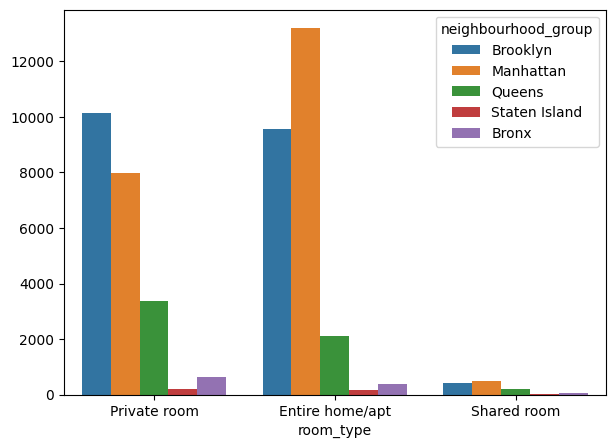

In [13]:
fig, axis = plt.subplots(figsize = (7, 5))

sns.countplot(data = total_data, x = "room_type", hue = "neighbourhood_group").set(ylabel = None)

plt.show()

Las habitaciones se alquilan más en Brooklyn seguido por Manhattan, justo lo contrario que con el alquiler de casas completas y habitaciones compartidas, luego Queens es el tercero en los tres tipos de alquiler, finalmente Bronx y Staten Island no tienen casi actividad.

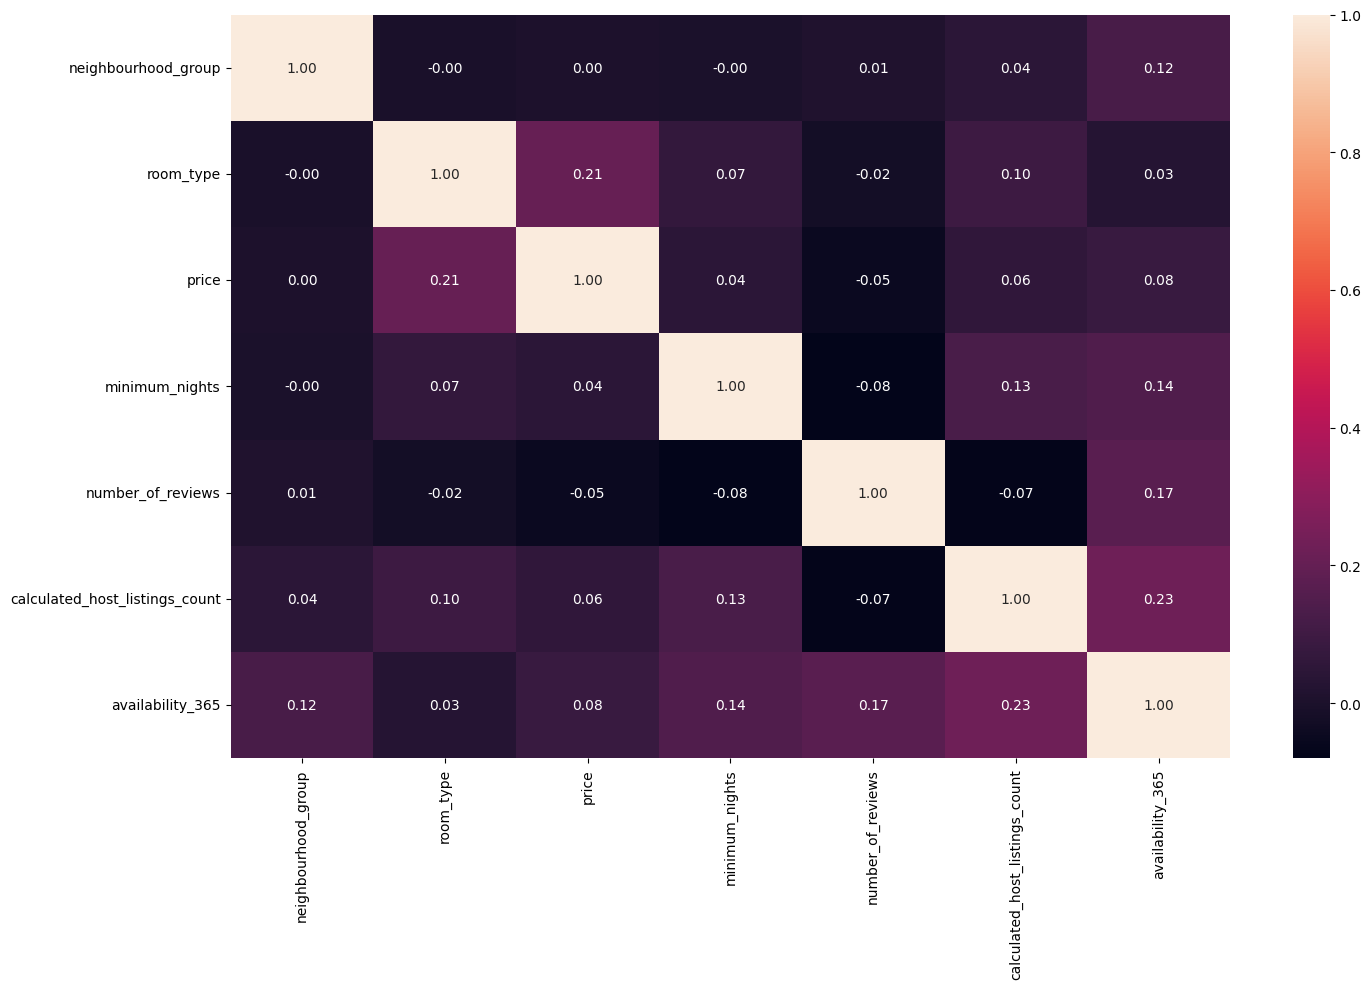

In [14]:

total_data["neighbourhood_group"] = pd.factorize(total_data["neighbourhood_group"])[0]
total_data["room_type"] = pd.factorize(total_data["room_type"])[0]

fig, axis = plt.subplots(figsize = (15, 10))

sns.heatmap(total_data[["neighbourhood_group", "room_type", "price", "minimum_nights", "number_of_reviews", "calculated_host_listings_count", "availability_365"]].corr(), annot = True, fmt = ".2f")

plt.tight_layout()

plt.show()

Las únicas relaciones que hay son entre el precio y el tipo de alquiler, lo cual es lógico, por norma general un piso entero costaría más que una habitación, y entre la cantidad de sitios listados para alquilar y su disponibilidad, pero no es una relación muy fuerte.

/home/vscode/.local/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


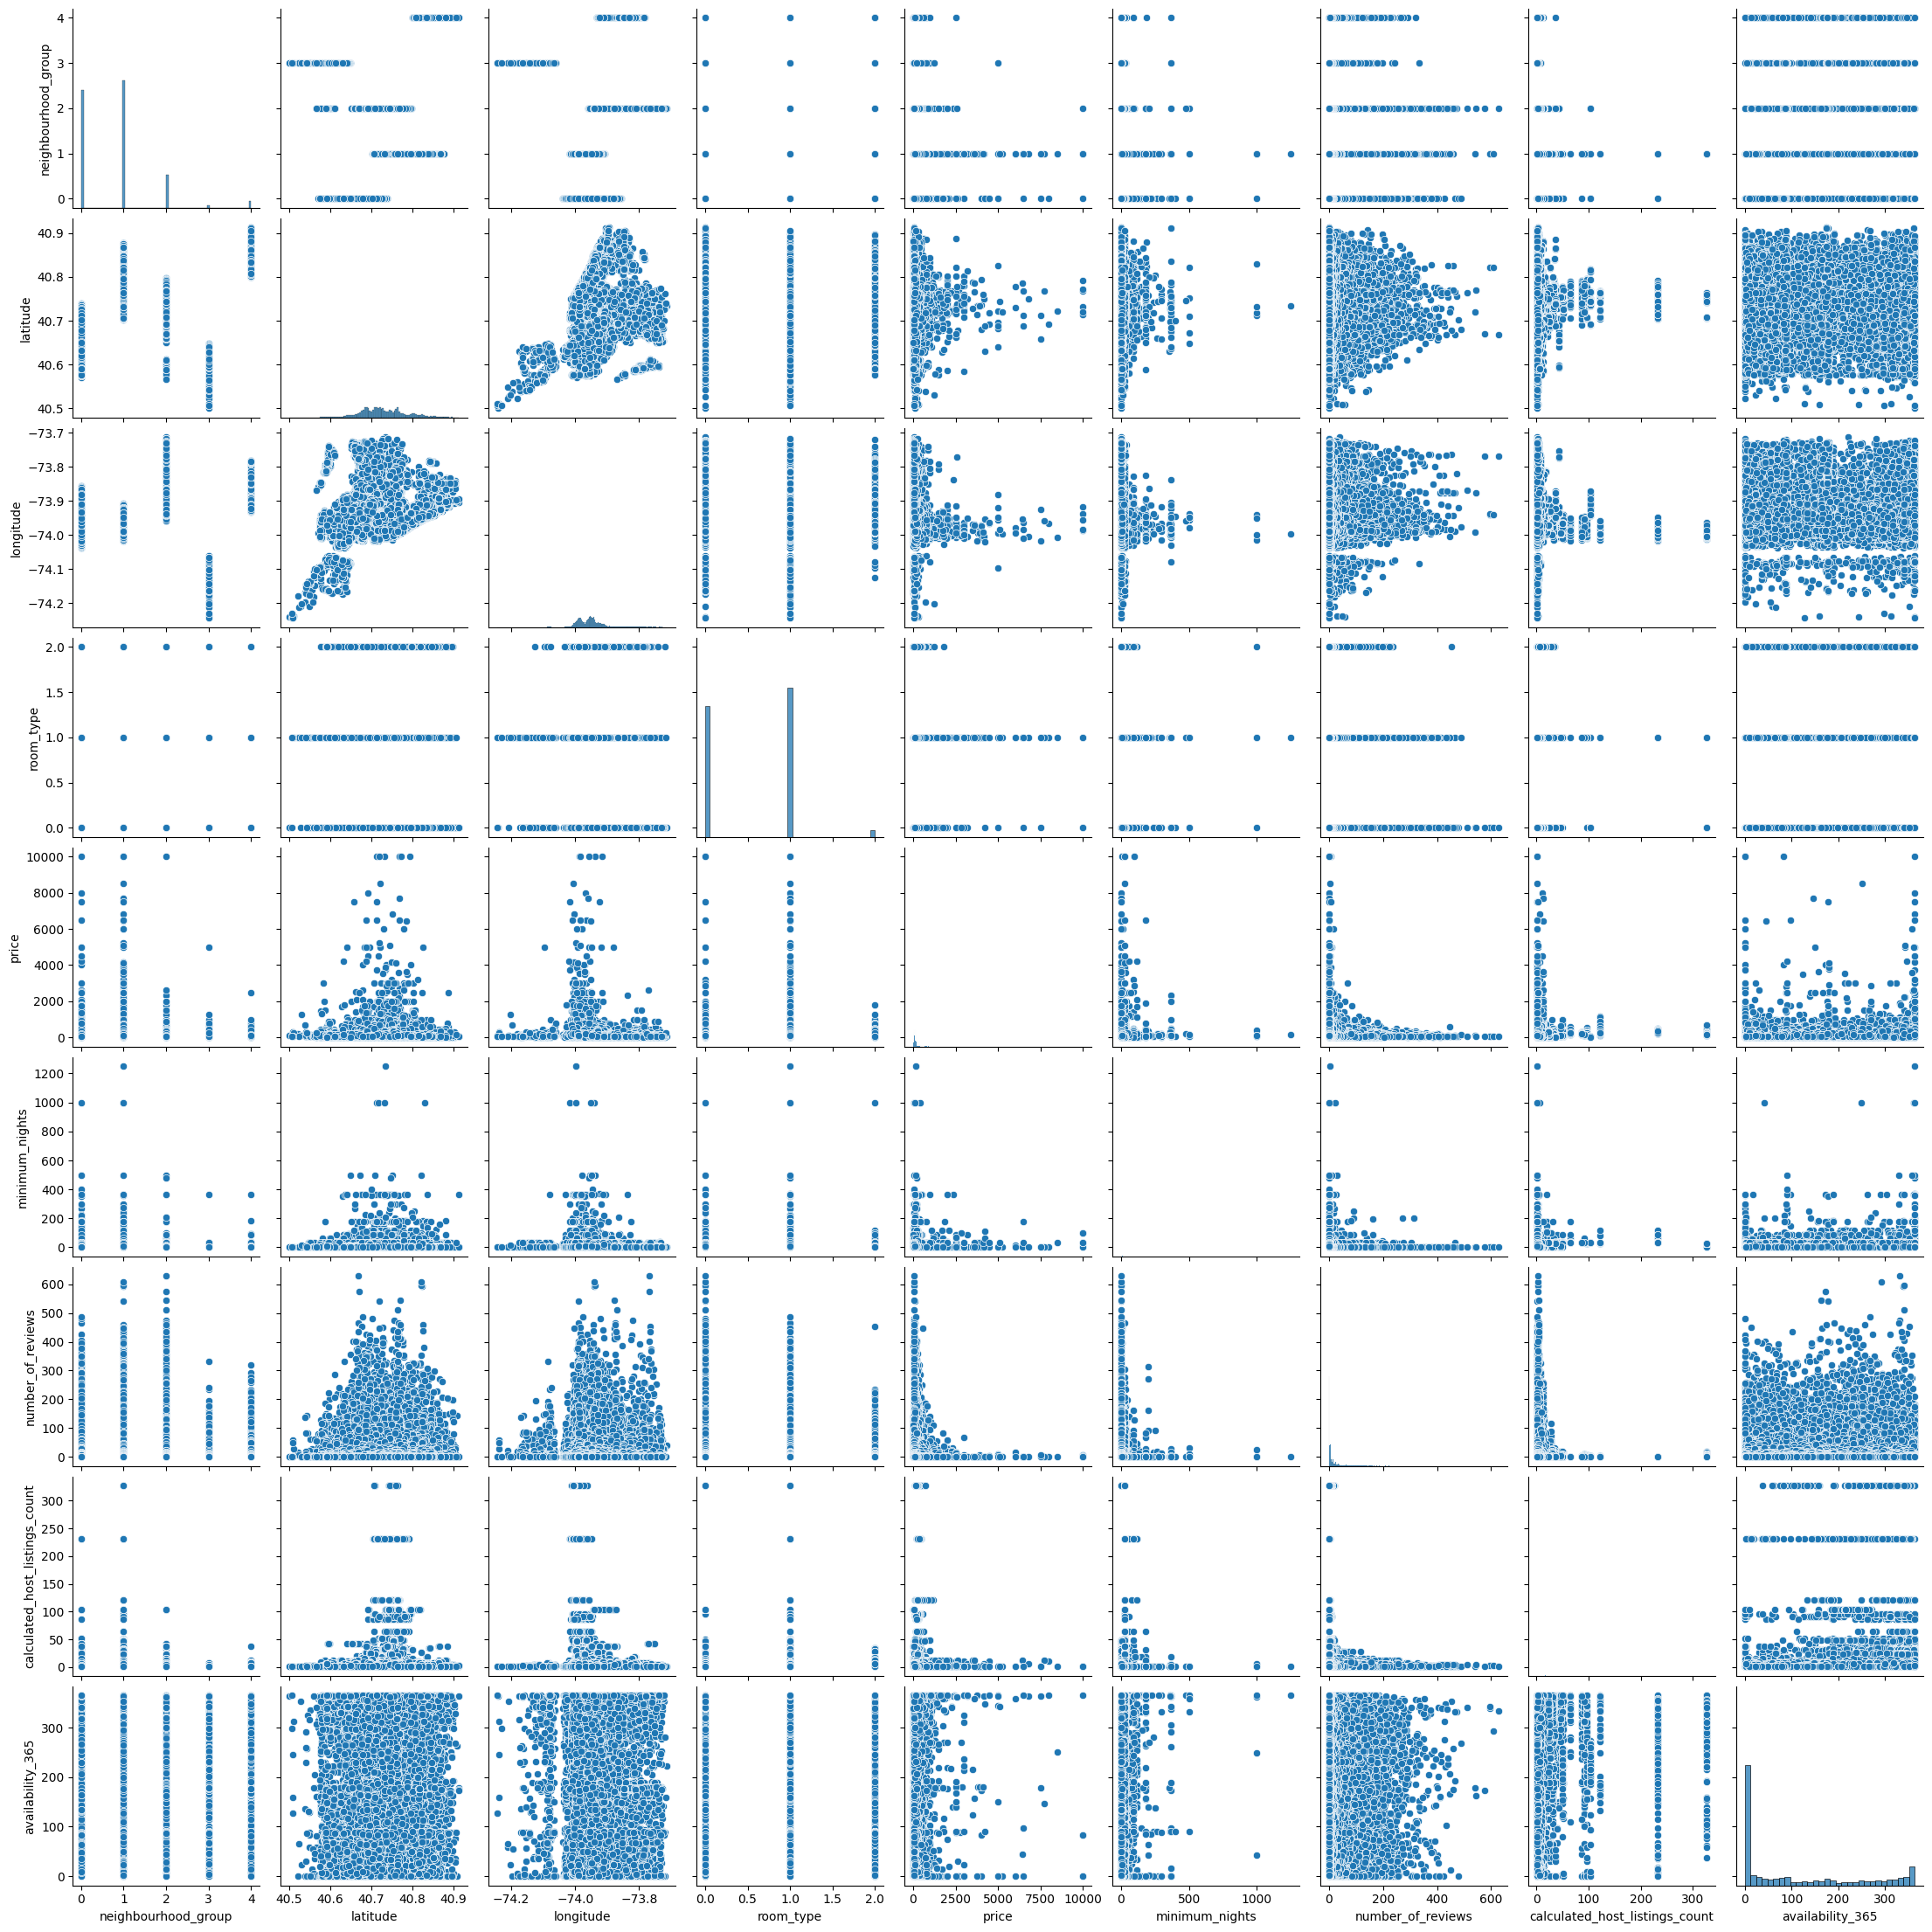

In [15]:
sns.pairplot(data = total_data)

In [16]:
total_data.describe()

,neighbourhood_group,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
count,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,0.786911,40.728949,-73.952170,0.567113,152.720687,7.029962,23.274466,7.143982,112.781327
std,0.844386,0.054530,0.046157,0.541249,240.154170,20.510550,44.550582,32.952519,131.622289
min,0.000000,40.499790,-74.244420,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
25%,0.000000,40.690100,-73.983070,0.000000,69.000000,1.000000,1.000000,1.000000,0.000000
50%,1.000000,40.723070,-73.955680,1.000000,106.000000,3.000000,5.000000,1.000000,45.000000
75%,1.000000,40.763115,-73.936275,1.000000,175.000000,5.000000,24.000000,2.000000,227.000000
max,4.000000,40.913060,-73.712990,2.000000,10000.000000,1250.000000,629.000000,327.000000,365.000000


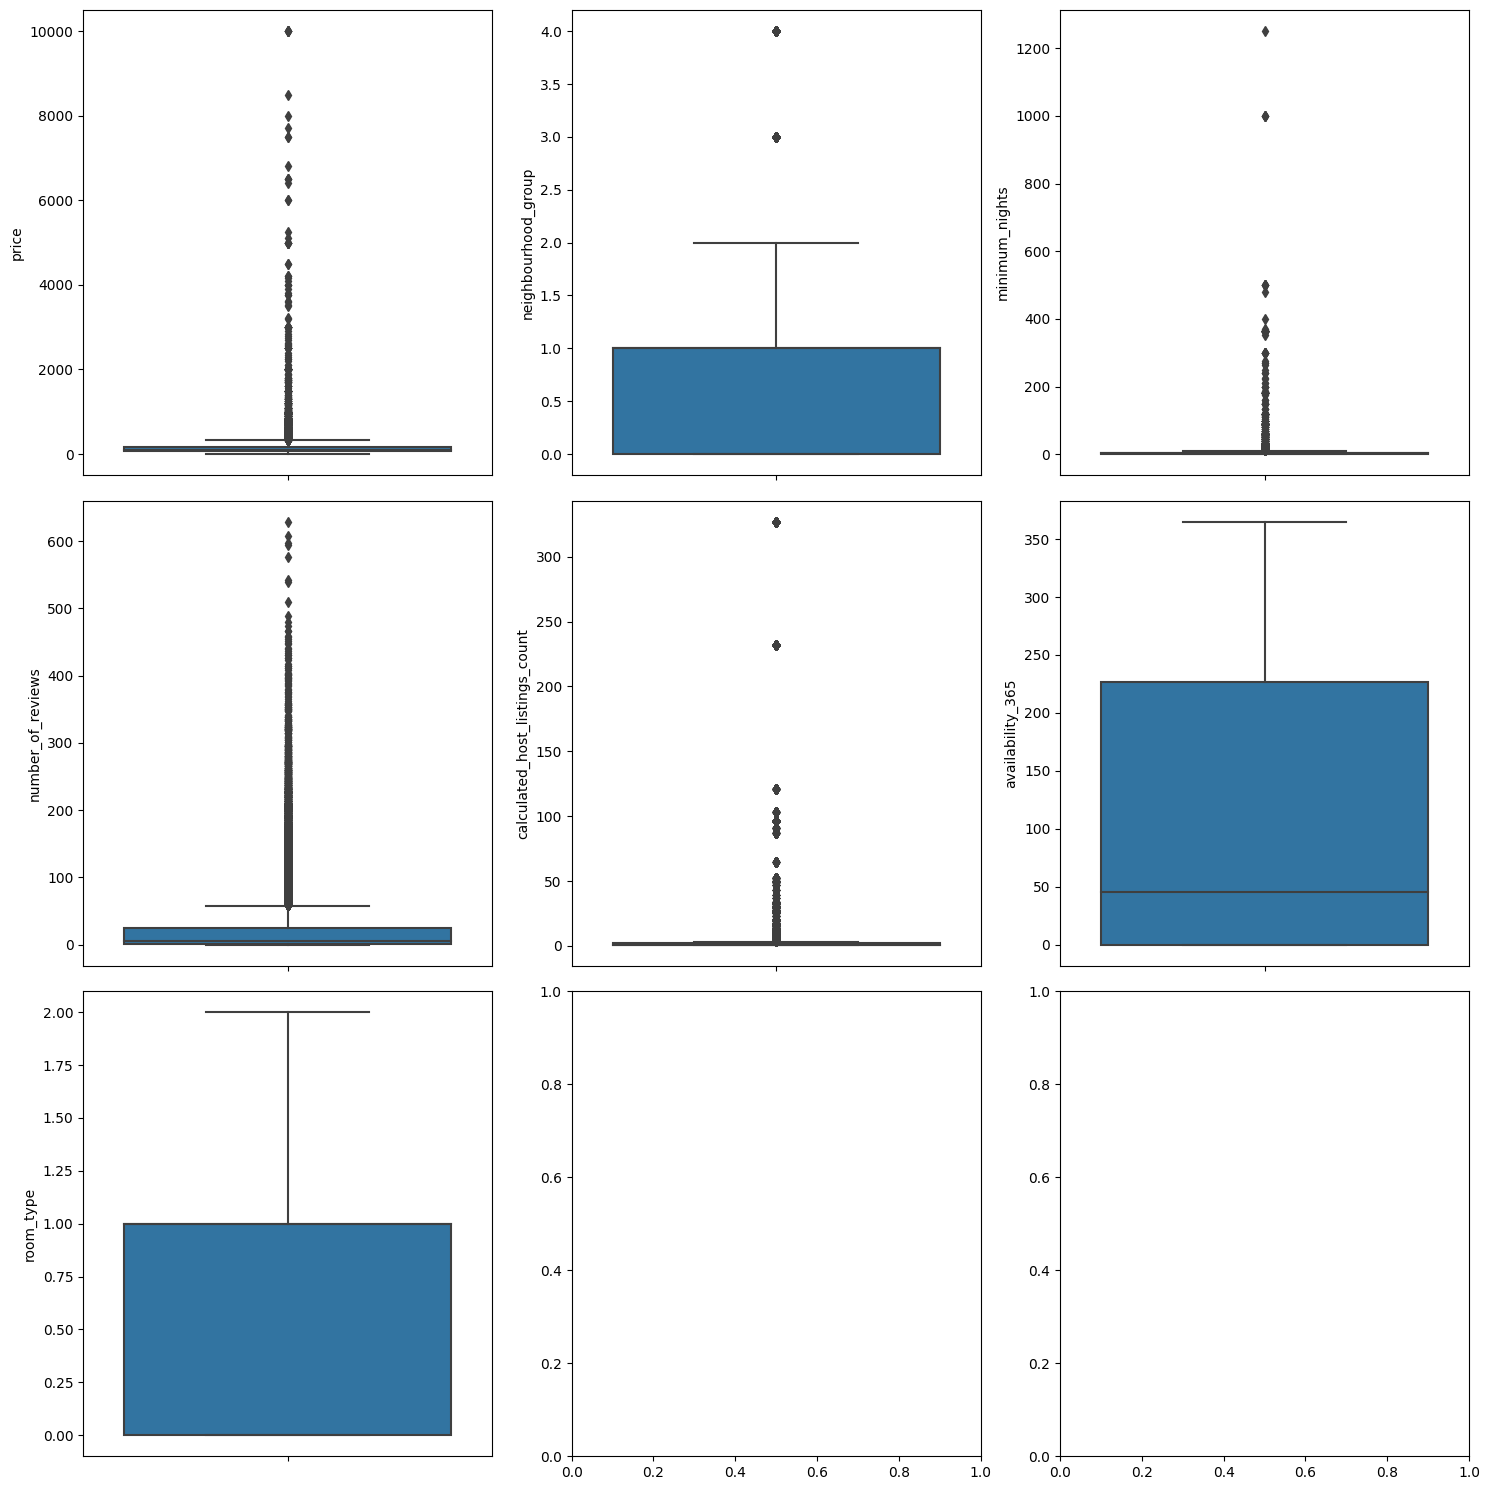

In [17]:
fig, axes = plt.subplots(3, 3, figsize = (15, 15))

sns.boxplot(ax = axes[0, 0], data = total_data, y = "price")
sns.boxplot(ax = axes[0, 1], data = total_data, y = "neighbourhood_group")
sns.boxplot(ax = axes[0, 2], data = total_data, y = "minimum_nights")
sns.boxplot(ax = axes[1, 0], data = total_data, y = "number_of_reviews")
sns.boxplot(ax = axes[1, 1], data = total_data, y = "calculated_host_listings_count")
sns.boxplot(ax = axes[1, 2], data = total_data, y = "availability_365")
sns.boxplot(ax = axes[2, 0], data = total_data, y = "room_type")

plt.tight_layout()
plt.show()


Vemos que tiene outliers "price", "minimum_nights", "number_of_reviews" y "calculated_host_listings_count"

In [18]:
price_stats = total_data["price"].describe()
price_stats

count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

In [19]:
price_iqr = price_stats["75%"] - price_stats["25%"]
upper_limit = price_stats["75%"] + 1.5 * price_iqr
lower_limit = price_stats["25%"] - 1.5 * price_iqr

print(f"Los límites superior e inferior para la búsqueda de outliers son {round(upper_limit, 2)} y {round(lower_limit, 2)}, con un rango intercuartílico de {round(price_iqr, 2)}")

Los límites superior e inferior para la búsqueda de outliers son 334.0 y -90.0, con un rango intercuartílico de 106.0


In [20]:
total_data = total_data[total_data["price"] > 1]

In [21]:
minimum_nights_stats = total_data["minimum_nights"].describe()
minimum_nights_stats

count    48884.000000
mean         7.029887
std         20.512224
min          1.000000
25%          1.000000
50%          3.000000
75%          5.000000
max       1250.000000
Name: minimum_nights, dtype: float64

In [22]:
min_nights_iqr = minimum_nights_stats["75%"] - minimum_nights_stats["25%"]
upper_limit = minimum_nights_stats["75%"] + 1.5 * min_nights_iqr
lower_limit = minimum_nights_stats["25%"] - 1.5 * min_nights_iqr

print(f"Los límites superior e inferior para la búsqueda de outliers son {round(upper_limit, 2)} y {round(lower_limit, 2)}, con un rango intercuartílico de {round(min_nights_iqr, 2)}")

Los límites superior e inferior para la búsqueda de outliers son 11.0 y -5.0, con un rango intercuartílico de 4.0


In [23]:
total_data = total_data[total_data["minimum_nights"] < 16]

In [24]:
reviews_stats = total_data["number_of_reviews"].describe()
reviews_stats

count    43265.000000
mean        25.211950
std         46.292011
min          0.000000
25%          1.000000
50%          6.000000
75%         27.000000
max        629.000000
Name: number_of_reviews, dtype: float64

In [25]:
reviews_iqr = reviews_stats["75%"] - reviews_stats["25%"]
upper_limit = reviews_stats["75%"] + 1.5 * reviews_iqr
lower_limit = reviews_stats["25%"] - 1.5 * reviews_iqr

print(f"Los límites superior e inferior para la búsqueda de outliers son {round(upper_limit, 2)} y {round(lower_limit, 2)}, con un rango intercuartílico de {round(reviews_iqr, 2)}")

Los límites superior e inferior para la búsqueda de outliers son 66.0 y -38.0, con un rango intercuartílico de 26.0


In [26]:
total_data = total_data[total_data["number_of_reviews"] < 100]

In [27]:
listing_stats = total_data["calculated_host_listings_count"].describe()
listing_stats

count    40289.000000
mean         3.468292
std         22.500464
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max        327.000000
Name: calculated_host_listings_count, dtype: float64

In [28]:
listing_iqr = listing_stats["75%"] - listing_stats["25%"]
upper_limit = listing_stats["75%"] + 1.5 * listing_iqr
lower_limit = listing_stats["25%"] - 1.5 * listing_iqr

print(f"Los límites superior e inferior para la búsqueda de outliers son {round(upper_limit, 2)} y {round(lower_limit, 2)}, con un rango intercuartílico de {round(listing_iqr, 2)}")

Los límites superior e inferior para la búsqueda de outliers son 3.5 y -0.5, con un rango intercuartílico de 1.0


In [29]:
total_data = total_data[total_data["calculated_host_listings_count"] < 5]

In [30]:
total_data.isnull().sum().sort_values(ascending=False)

neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [31]:
from sklearn.model_selection import train_test_split

num_variables = ["neighbourhood_group", "room_type", "minimum_nights", "number_of_reviews", "calculated_host_listings_count", "availability_365"]

# We divide the dataset into training and test samples
X = total_data.drop("price", axis = 1)[num_variables]
y = total_data["price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

X_train.head()

,neighbourhood_group,room_type,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
7537,0,1,4,44,1,88
24780,0,0,1,16,1,0
42419,0,0,1,16,2,169
3764,1,1,2,1,1,0
48764,2,0,2,0,1,85


In [32]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)

X_train_scal = scaler.transform(X_train)
X_train_scal = pd.DataFrame(X_train_scal, index = X_train.index, columns = num_variables)

X_test_scal = scaler.transform(X_test)
X_test_scal = pd.DataFrame(X_test_scal, index = X_test.index, columns = num_variables)

X_train_scal.head()

,neighbourhood_group,room_type,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
7537,0.00,0.5,0.214286,0.444444,0.000000,0.241096
24780,0.00,0.0,0.000000,0.161616,0.000000,0.000000
42419,0.00,0.0,0.000000,0.161616,0.333333,0.463014
3764,0.25,0.5,0.071429,0.010101,0.000000,0.000000
48764,0.50,0.0,0.071429,0.000000,0.000000,0.232877


In [34]:
from sklearn.feature_selection import f_classif, SelectKBest

selection_model = SelectKBest(f_classif, k = 5)
selection_model.fit(X_train, y_train)
ix = selection_model.get_support()
X_train_sel = pd.DataFrame(selection_model.transform(X_train), columns = X_train.columns.values[ix])
X_test_sel = pd.DataFrame(selection_model.transform(X_test), columns = X_test.columns.values[ix])

X_train_sel.head()

,room_type,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,1,4,44,1,88
1,0,1,16,1,0
2,0,1,16,2,169
3,1,2,1,1,0
4,0,2,0,1,85


In [35]:
X_test_sel.head()

,room_type,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,1,2,4,1,103
1,1,3,69,1,5
2,1,3,6,1,0
3,1,3,3,1,160
4,1,2,37,4,70


In [36]:
X_train_sel["price"] = list(y_train)
X_test_sel["price"] = list(y_test)

In [38]:
X_train_sel.to_csv("../data/processed/X_train.csv", index=False)
X_test_sel.to_csv("../data/processed/X_test.csv", index=False)